In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


In [41]:
df=pd.read_csv("C:/Users/tienv/Downloads/Mall_Customers.csv")
print(df.shape)
print(df.dtypes)
print(df.head())

(200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [42]:
#loại bỏ cột ID
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)
    print("Đã loại bỏ cột CustomerID.")

print("\nCác cột còn lại sau khi loại bỏ:")
print(df.columns.tolist())

Đã loại bỏ cột CustomerID.

Các cột còn lại sau khi loại bỏ:
['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [43]:
#kiểm tra missing value
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
#loại bỏ dòng trùng
df.duplicated().sum()
df.drop_duplicates(inplace=True)

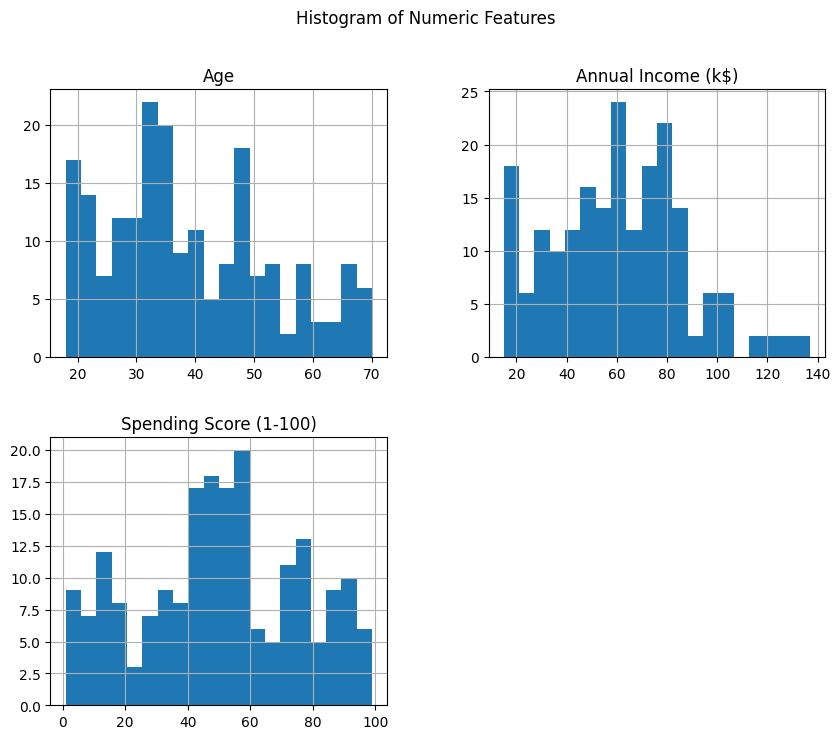

In [45]:
#histogram biến
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histogram of Numeric Features")
plt.show()


In [46]:
# phân phối của biến phân loại
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Gender:
Gender
Female    112
Male       88
Name: count, dtype: int64


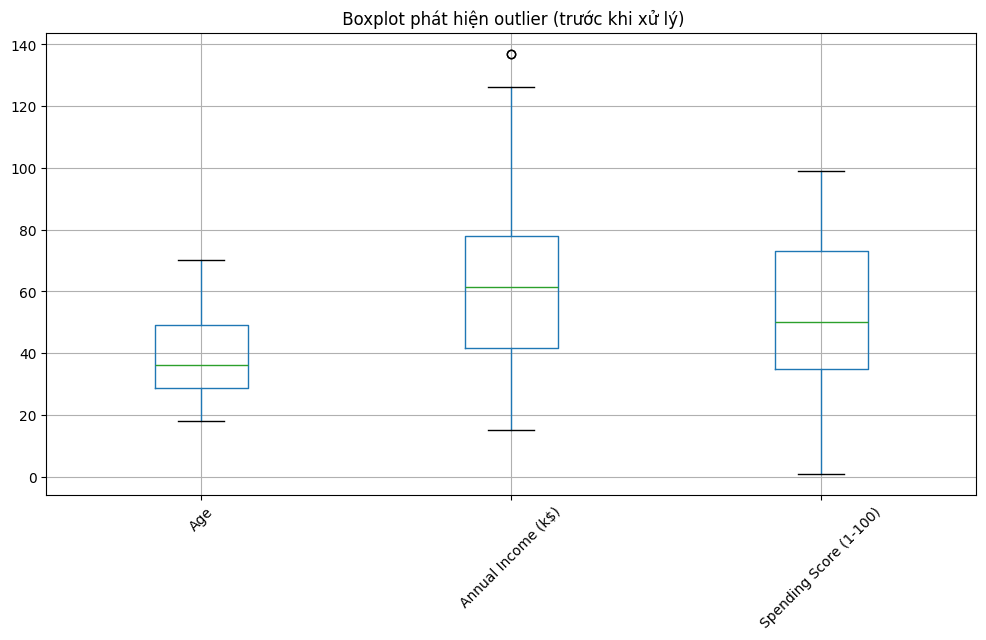

In [47]:
#kiểm tra outlier
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title(" Boxplot phát hiện outlier (trước khi xử lý)")
plt.xticks(rotation=45)
plt.show()


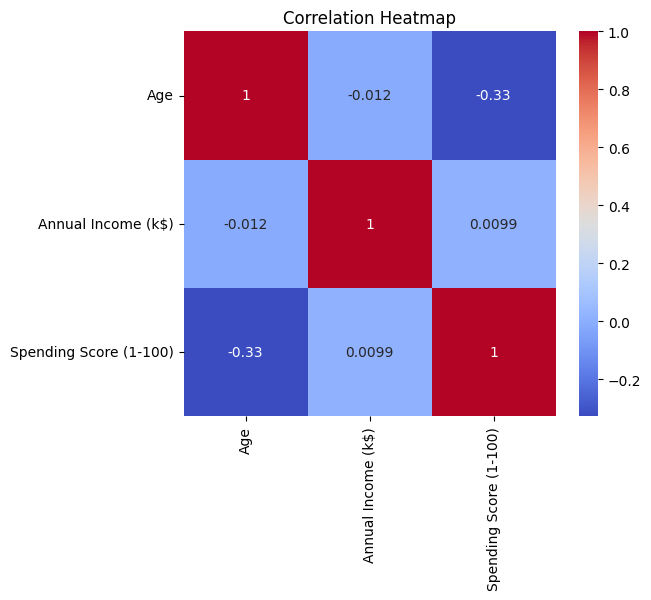

In [48]:
#ma trận tương quan
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Sau khi loại outlier: (198, 4)


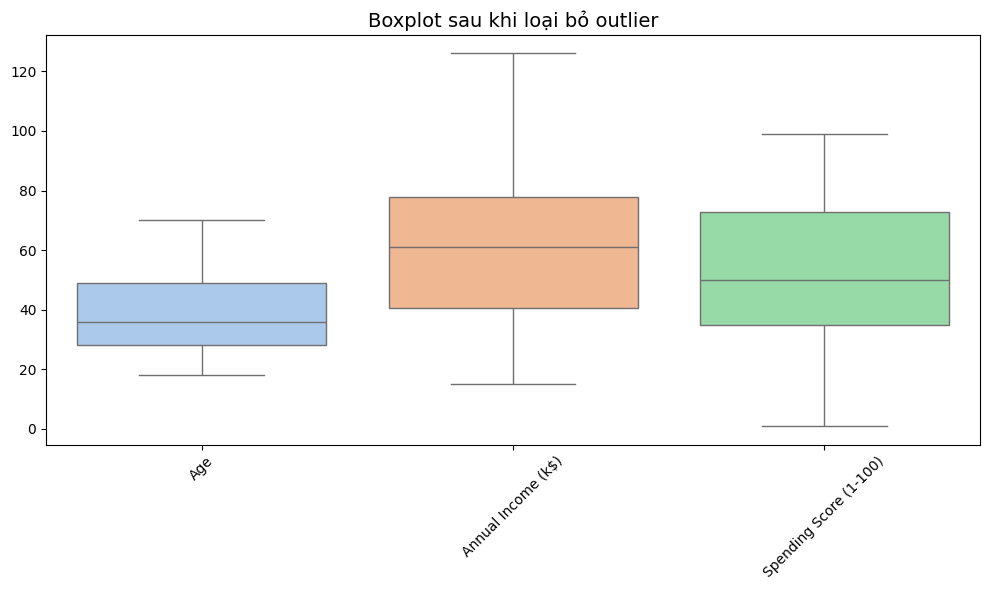

In [49]:
#xử lí outlier
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

numeric_cols = df.select_dtypes(include=np.number).columns
df = remove_outliers_iqr(df, numeric_cols)
print("Sau khi loại outlier:", df.shape)

# boxplot sau khi loại bỏ outlier
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], palette="pastel")
plt.title("Boxplot sau khi loại bỏ outlier", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

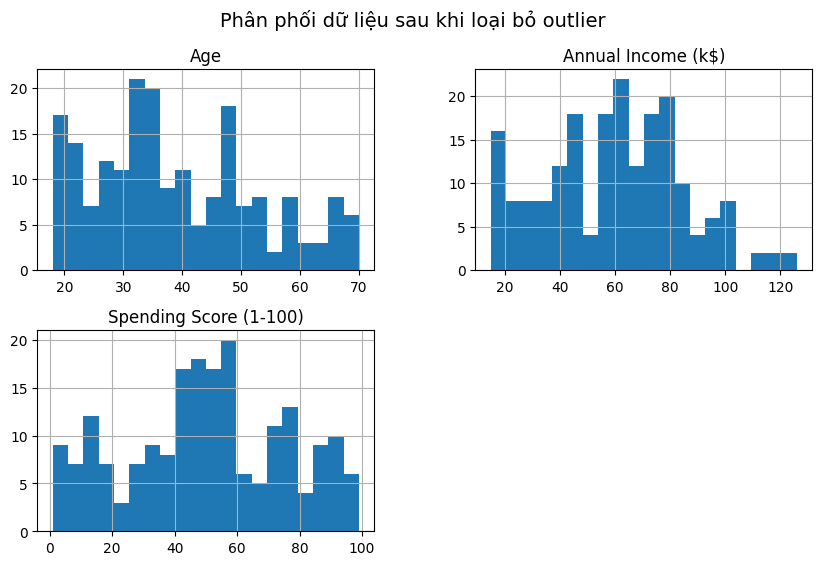

In [50]:
#phân phối sau khi loại bỏ outlier
#histogram
df.hist(bins=20, figsize=(10,6))
plt.suptitle("Phân phối dữ liệu sau khi loại bỏ outlier", fontsize=14)
plt.show()

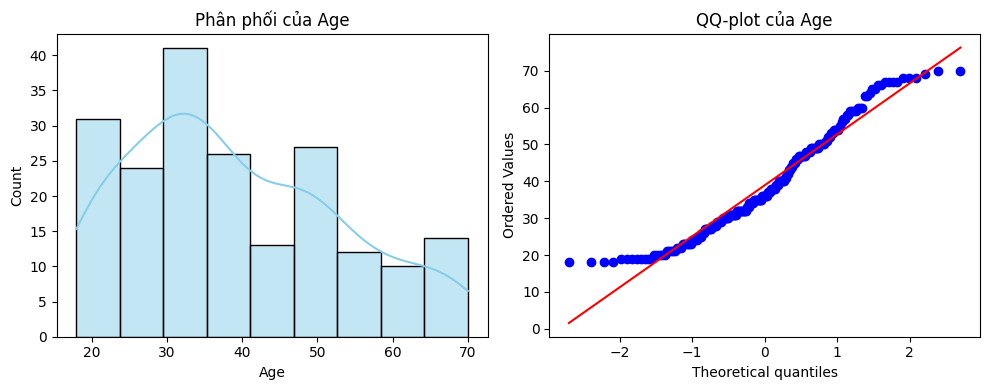

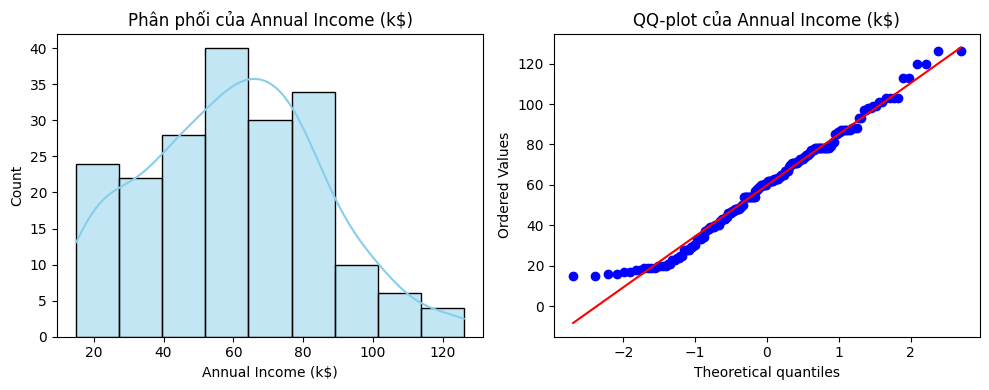

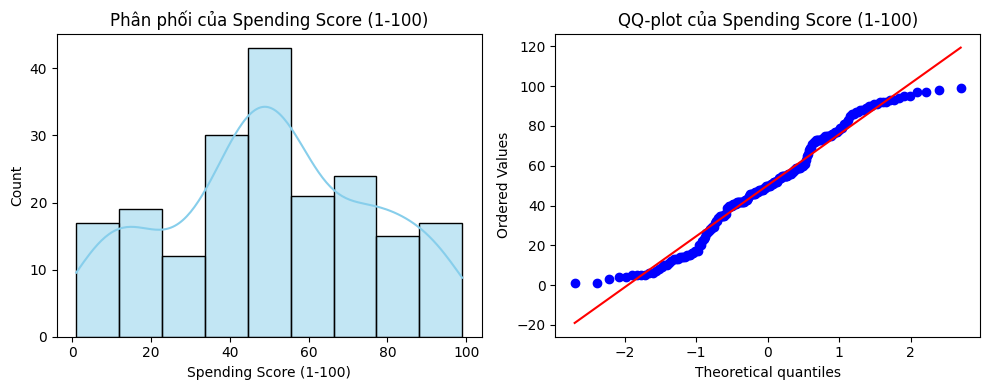

Age: p-value = 0.0000
 → Không phải phân phối chuẩn (bác bỏ H0)

Annual Income (k$): p-value = 0.0082
 → Không phải phân phối chuẩn (bác bỏ H0)

Spending Score (1-100): p-value = 0.0003
 → Không phải phân phối chuẩn (bác bỏ H0)



In [51]:
import scipy.stats as stats
from scipy.stats import shapiro, normaltest

# Chọn các cột số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# --- 1️⃣ Kiểm tra trực quan: Histogram + QQ-Plot ---
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    
    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Phân phối của {col}')
    
    # QQ-plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ-plot của {col}')
    
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p:.4f}")
    if p > 0.05:
        print(" → Có thể coi là phân phối chuẩn (không bác bỏ H0)\n")
    else:
        print(" → Không phải phân phối chuẩn (bác bỏ H0)\n")


In [52]:
#mã hóa biến phân loại
df = pd.get_dummies(df, drop_first=True)
print("Sau khi mã hóa:", df.shape)
print(df.head())

Sau khi mã hóa: (198, 4)
   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39         True
1   21                  15                      81         True
2   20                  16                       6        False
3   23                  16                      77        False
4   31                  17                      40        False


In [53]:
# chuẩn hóa dl
scaler = StandardScaler()

X_cols = [c for c in df.columns if c != "Spending Score (1-100)"]
df[X_cols] = scaler.fit_transform(df[X_cols])

print("Sau khi chuẩn hóa:")
print(df.head())

Sau khi chuẩn hóa:
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.425414           -1.779171                      39     1.141195
1 -1.282367           -1.779171                      81     1.141195
2 -1.353890           -1.739447                       6    -0.876275
3 -1.139319           -1.739447                      77    -0.876275
4 -0.567131           -1.699723                      40    -0.876275


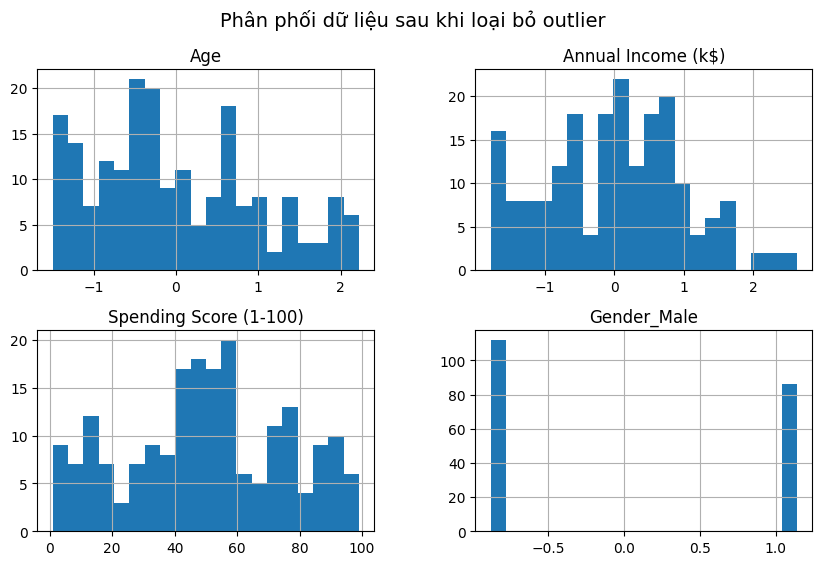

In [54]:
#sau khi chuẩn hóa và loại bỏ ouulier
#histogram
df.hist(bins=20, figsize=(10,6))
plt.suptitle("Phân phối dữ liệu sau khi loại bỏ outlier", fontsize=14)
plt.show()


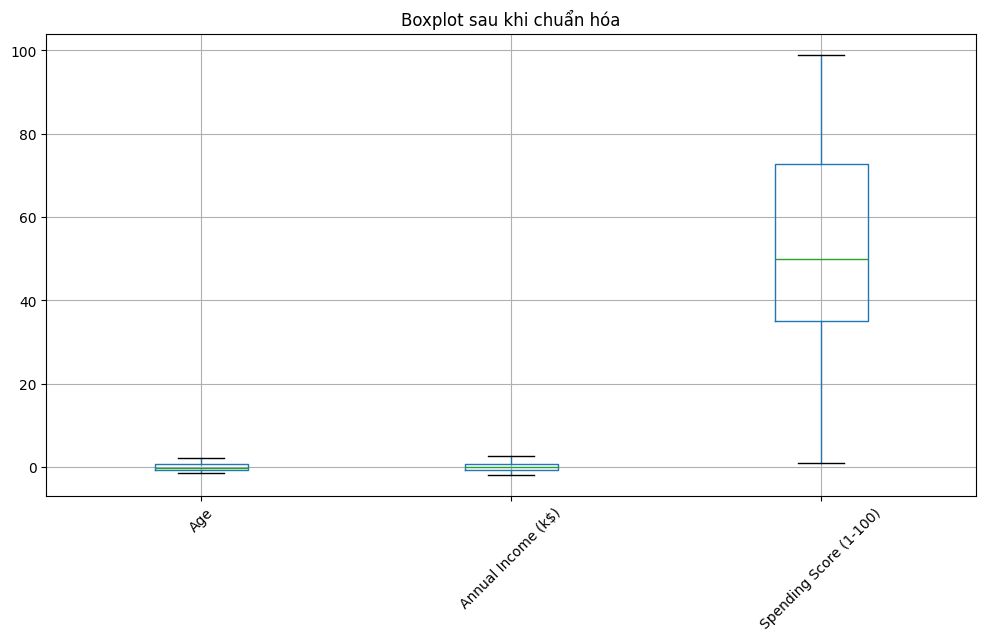

In [55]:
#boxplot sau chuẩn hóa
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot sau khi chuẩn hóa")
plt.xticks(rotation=45)
plt.show()


   Thành phần PCA  Tỉ lệ phương sai riêng  Phương sai tích lũy
0               1                0.995641             0.995641
1               2                0.001562             0.997203
2               3                0.001480             0.998683
3               4                0.001317             1.000000


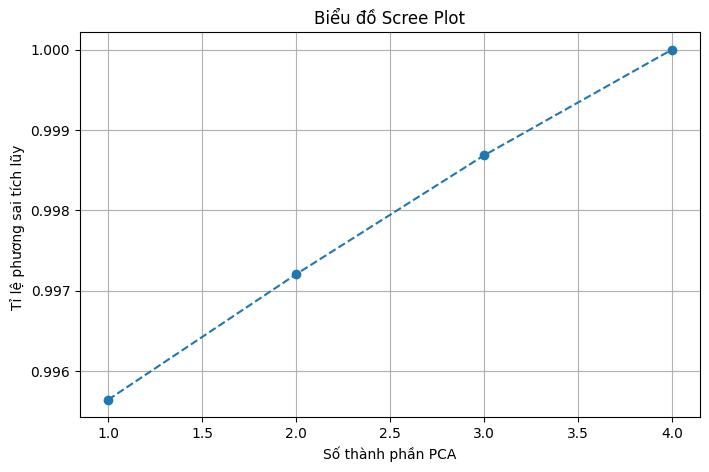

In [56]:
# tỉ lệ phương sai giải thích
pca_full = PCA()
pca_full.fit(df)
explained_var_ratio = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

#  tổng quan
var_table = pd.DataFrame({
    "Thành phần PCA": np.arange(1, len(explained_var_ratio) + 1),
    "Tỉ lệ phương sai riêng": explained_var_ratio,
    "Phương sai tích lũy": cumulative_var
})
print(var_table)

# biểu đồ Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var_ratio)+1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Số thành phần PCA')
plt.ylabel('Tỉ lệ phương sai tích lũy ')
plt.title('Biểu đồ Scree Plot')
plt.grid(True)
plt.show()

In [57]:
df.to_excel("tienxl.xlsx", index=False)